In [1]:
import numpy as np
from cosmoTransitions.tunneling1D import SingleFieldInstanton
from cosmoTransitions import generic_potential_Gegenbauer
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.integrate as integrate
import random
from scipy import interpolate, special
import seaborn as sns
from scipy import misc
from scipy.special import gegenbauer
from scipy.special import eval_gegenbauer
from scipy.special import roots_gegenbauer



%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size

label_size=20
thick_size=20


####Some definitions##
v2 = 246.2**2
mh=125.09
v=246.2
alpha=1/137
sinthw=np.sqrt(0.223)
g1=np.sqrt(4*np.pi*alpha/(1-sinthw**2))
g=np.sqrt(4*np.pi*alpha)/sinthw
Mplanck=2.4*10**18
cs=1/3**0.5 ##Sound speed constant


####This code uses an interpoaltion function for the number of degrees of freedom as function of temperature
###Data is obtained from https://member.ipmu.jp/satoshi.shirai/EOS2018
gtab = np.loadtxt( 'standardmodel2018.txt' )[::20]
g_star=interpolate.interp1d(gtab[::,0], gtab[::,1], kind='cubic')
g_sstar=interpolate.interp1d(gtab[::,0], gtab[::,3], kind='cubic')


def Hubble_radiation(T):
    """Hubble rate (squared) coming from radiation dof"""
    num_dof=g_star(T)
    Hubble_rad_squared=num_dof*np.pi**2/90*T**4/Mplanck**2
    return Hubble_rad_squared

def Gamma_Hubble4(S,T):
    """Nucleation probability per Hubble volume, including matter contribution. 
    Integrand in formula (2.2) 1809.08242 """
    Gamma1=T**4*np.exp(-S/T)*np.sqrt((S/2/np.pi/T))**(3)
    return Gamma1


####MY FUNCTIONS START HERE      


def GBpotential(z,**coeffs):
    """Evaluate a linear combination of Gegenbauer polynomials at the point z. 
    coeffs: dictionary containing {Ngb, [(n1,a1),...]} where a is the coefficient in front 
    of the polynomial of order n"""
    Ngb=coeffs["Ngb"]
    lam=(Ngb-1)/2
    x=np.cos(z)
    pot=0
    for n,a in coeffs["na_coeffs"]:
        pot+=a*eval_gegenbauer(n,lam,x)
    return pot

def findGBminima(potential,**args):
    fun=lambda z :potential(z,**args)
    Dfun=lambda z :misc.derivative(fun, x0=z, dx=1e-2, n=1)
    D2fun=lambda z :misc.derivative(fun, x0=z, dx=1e-2, n=2)
    sols=[]
    for i in np.linspace(0,np.pi/2,30):
        #sol=optimize.fmin(Dfun, x0=i,disp=False,ftol=1e-25)
        sol=optimize.root(Dfun, x0=i)
        #sol=optimize.root(Dfun, [i], jac=Dfun, method='hybr')
        if sol.x<0 or D2fun(sol.x)<0 or sol.x>np.pi/2:
            continue
        sols.append(np.round(sol.x,4))
        
    return np.unique(sols)




Minimum value of next Gegenbauer is n2= 212.9813511706787
Which ceils to n2= 213
True True 1.0001739130434784


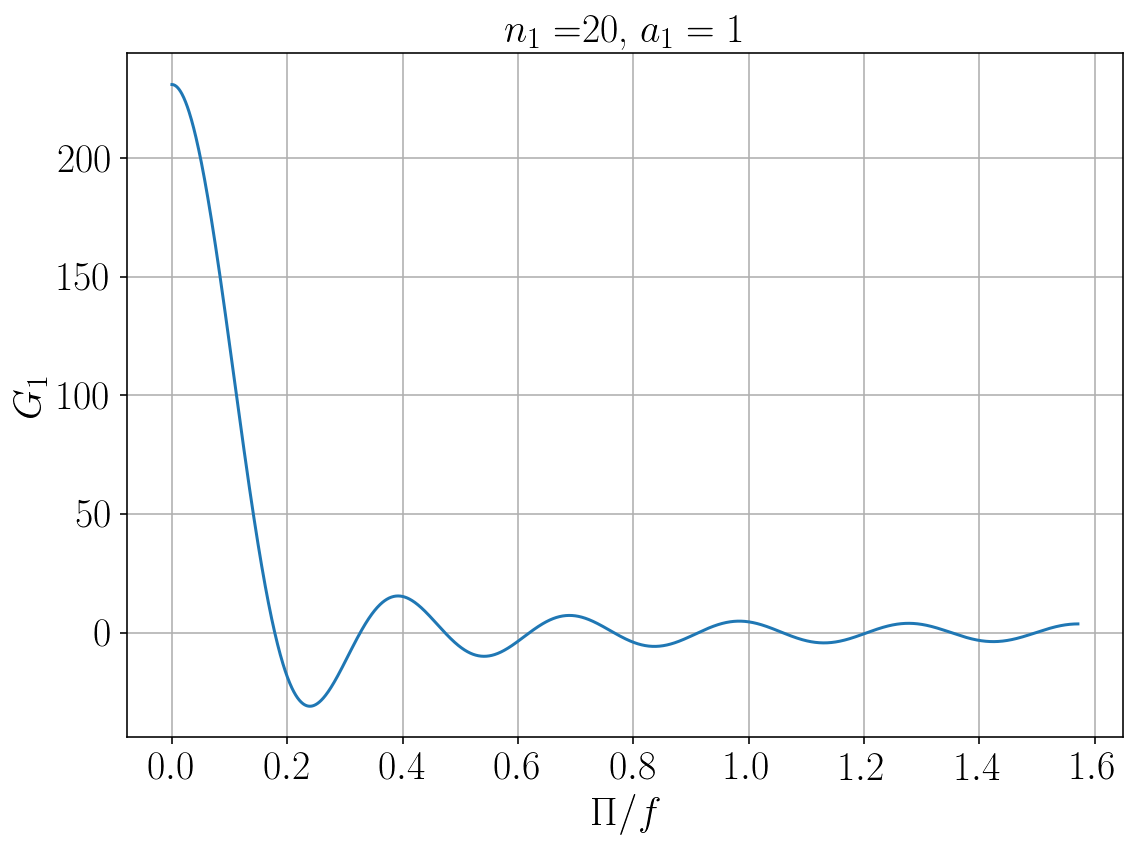

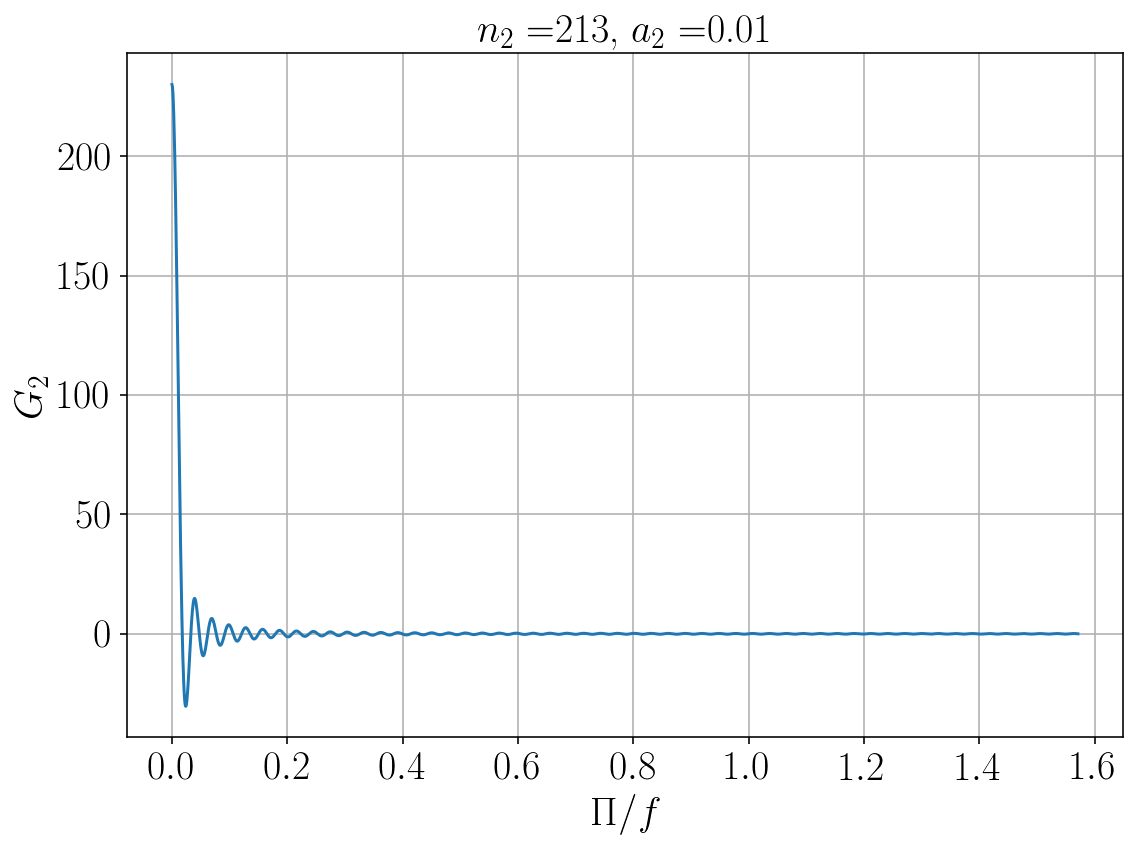

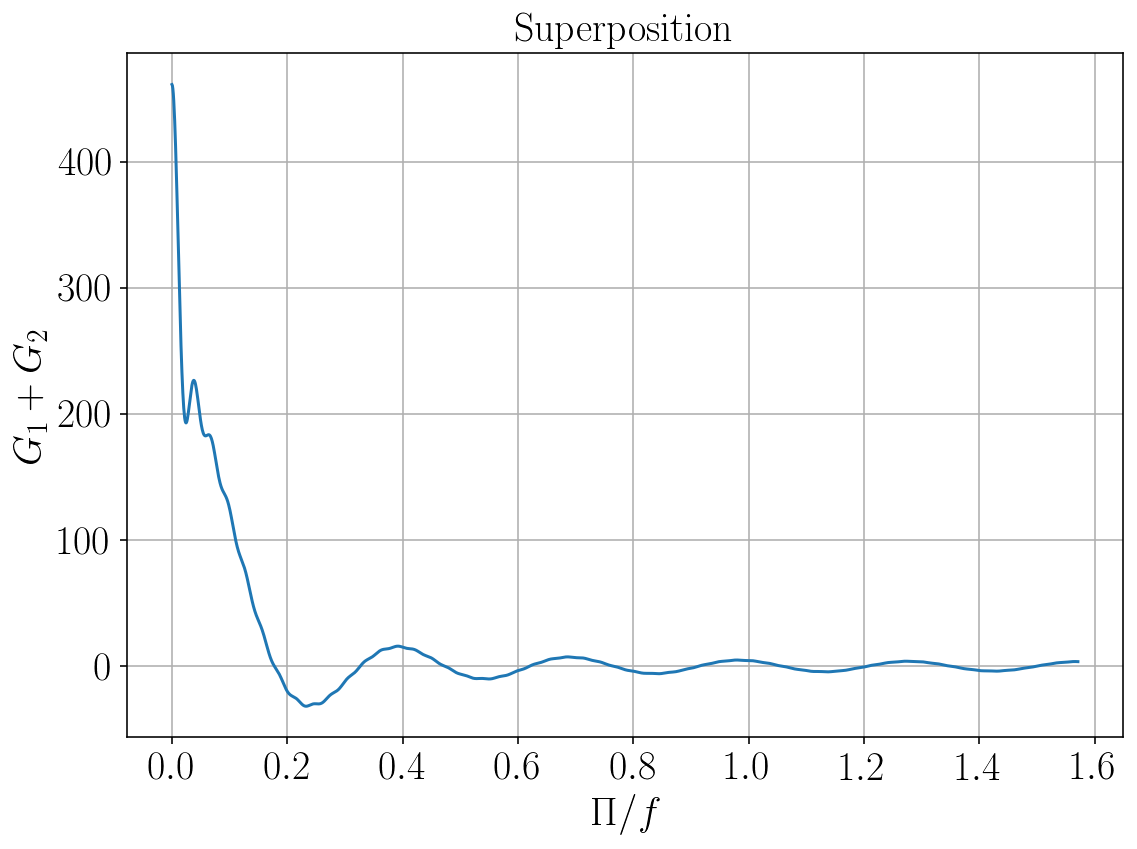

In [2]:
lam=1.5

n1, a1 =20,1
a2 =.01

n2_least=-lam + np.sqrt(lam**2 + n1*(n1+2*lam)*abs(a1/a2))
print("Minimum value of next Gegenbauer is n2=",n2_least)
n2=np.int(np.ceil(n2_least))
#if n2%2==1:
#    n2+=1
n2+=0
print("Which ceils to n2=",n2)
print(a2<a1 , n2*(n2+2*lam)>abs(a1/a2)*n1*(n1+2*lam) , n2*(n2+2*lam)/(abs(a1/a2)*n1*(n1+2*lam)))

myargs={"Ngb":4,"na_coeffs":[(n1, a1)]}
z_range=np.linspace(0,np.pi/2,2000)
#min_list=findGBminima(GBpotential,**myargs)
plt.plot(z_range,GBpotential(z_range,**myargs))
#plt.scatter(min_list,GBpotential(min_list,**myargs),c="r")
plt.xlabel("$\Pi/f$",size=label_size)
plt.ylabel("$G_1$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.grid(True)
plt.title("$n_1=$"+str(n1)+", $a_1=1$",size=label_size)
plt.tight_layout()
#plt.savefig('./PLOTS/G_hierachical_1.pdf', dpi=300)
plt.show()


myargs={"Ngb":4,"na_coeffs":[(n2, a2)]}
z_range=np.linspace(0,np.pi/2,2000)
#min_list=findGBminima(GBpotential,**myargs)
plt.plot(z_range,GBpotential(z_range,**myargs))
#plt.scatter(min_list,GBpotential(min_list,**myargs),c="r")
plt.xlabel("$\Pi/f$",size=label_size)
plt.ylabel("$G_2$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.grid(True)
plt.title("$n_2=$"+str(n2)+", $a_2=$"+str(a2),size=label_size)
plt.tight_layout()
#plt.savefig('./PLOTS/G_hierachical_2.pdf', dpi=300)
plt.show()

myargs={"Ngb":4,"na_coeffs":[(n1, a1),(n2, a2)]}
z_range=np.linspace(0,np.pi/2,2000)
#min_list=findGBminima(GBpotential,**myargs)
plt.plot(z_range,GBpotential(z_range,**myargs))
#plt.scatter(min_list,GBpotential(min_list,**myargs),c="r")
plt.xlabel("$\Pi/f$",size=label_size)
plt.ylabel("$G_1+G_2$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.grid(True)
plt.title("Superposition",size=label_size)
plt.tight_layout()
#plt.savefig('./PLOTS/G_hierachical_3.pdf', dpi=300)
plt.show()

In [2]:
class model1(generic_potential_Gegenbauer.generic_potential):

    def init(self, adict):
        self.Ndim = 1
        self.Ngb=adict["Ngb"]
        self.adict=adict
        
        min_list=findGBminima(GBpotential,**adict)
        V_min=min(GBpotential(min_list,**adict))
        global_min=list(GBpotential(min_list,**adict)).index(V_min)
        
        self.vacua_list=min_list
        self.f=v/min_list[global_min]
        self.renormScaleSq = self.f**2
        
        ##Determine normalization constant
        fun=lambda h : GBpotential(h/self.f,**adict)
        DG=misc.derivative(fun, x0=v, dx=1e-2, n=1,order=5)
        D2G=misc.derivative(fun, x0=v, dx=1e-2, n=2,order=5)
        self.const=mh**2/((-v*DG+(self.f**2-v**2)*D2G)/self.f**2) ##Formula 2.2 of on draft
        #print(self.const/self.f**4)
        
        #z_range=np.linspace(0,self.f*np.pi/2,1000)
        #self.pot_fun=interpolate.interp1d(z_range,GBpotential(z_range,**adict))
 
    def forbidPhaseCrit(self, X):
        return any([np.array([X])[...,0] < -5.0])

    def V0(self, X):
        X = np.asanyarray(X)
        h = X[...]
        z=h/self.f
        #pot = self.const*self.pot_fun(z)
        pot =self.const*GBpotential(z,**self.adict)
        
        return pot
    

    
    def plot1(self):
        z_range=np.linspace(0,self.f*np.pi/2,300)

        plt.plot(z_range,self.V0(z_range),label="Tree-level")
        plt.scatter(self.vacua_list*self.f,self.V0(self.f*self.vacua_list))

        plt.xlabel("$\Pi$ [GeV]",size=label_size)
        plt.ylabel("$G$",size=label_size)
        plt.legend()
        plt.legend(prop={'size': label_size})
        plt.xticks(fontsize=thick_size)
        plt.yticks(fontsize=thick_size)
        plt.grid(True)
        #mytitle=str(round(df_full.lams.min(),2))+"$< \\lambda_{s} <$"+str(round(df_full.lams.max(),2))
        #plt.title(mytitle,size=label_size)
        plt.tight_layout()
        #plt.savefig('./LISA_SCANS_1/CLUSTER/PLOTS/lagrangian_params_marginalized.pdf', dpi=300)
        #plt.show()
        
    def plot2(self,T):
        z_range=np.linspace(1e-7,self.f*np.pi/2,200)

        plt.plot(z_range,self.Vtot(z_range,T),"g--",label="1-loop potential")
        #plt.scatter(self.vacua_list*self.f,self.Vtot(self.f*self.vacua_list,0))
        
        plt.legend()
        plt.legend(prop={'size': label_size})
        plt.xlabel("$\Pi$ [GeV]",size=label_size)
        plt.ylabel("$G$",size=label_size)
        plt.xticks(fontsize=thick_size)
        plt.yticks(fontsize=thick_size)
        plt.grid(True)
        mytitle="Effective potential at T= "+str(np.round(T,1))+" GeV"
        plt.title(mytitle,size=label_size)
        plt.tight_layout()
        #plt.savefig('./LISA_SCANS_1/CLUSTER/PLOTS/lagrangian_params_marginalized.pdf', dpi=300)
        #plt.show()
        
    
    def boson_massSq(self, X, T):
        X = np.asanyarray(X)
        h = X[...,]
        
        ##Determine normalization constant
        fun=lambda x :self.V0(x)
        DG=misc.derivative(fun, x0=h, dx=1e-2, n=1,order=5)
        D2G=misc.derivative(fun, x0=h, dx=1e-2, n=2,order=5)

        Mh2=(-h*DG+(self.f**2-h**2)*D2G)/self.f**2
        MG2=(self.f**2-h**2)*DG/self.f**2/(h)

        M = np.array([Mh2,MG2])
        M = np.rollaxis(M, 0, len(M.shape))


        dof = np.array([1,self.Ngb-1])

        c = np.array([.5,.5])

        return M, dof, c
    
    def fermion_massSq(self, X):
        X = np.asanyarray(X)
        h = X[...,]

        mt=1**2*h**2/2
        M = np.array([mt])

        # At this point, we have an array of boson masses, but each entry might
        # be an array itself. This happens if the input X is an array of points.
        # The generic_potential class requires that the output of this function
        # have the different masses lie along the last axis, just like the
        # different fields lie along the last axis of X, so we need to reorder
        # the axes. The next line does this, and should probably be included in
        # all subclasses.
        M = np.rollaxis(M, 0, len(M.shape))

        # The number of degrees of freedom for the masses. This should be a
        # one-dimensional array with the same number of entries as there are
        # masses.
        dof = 0*np.array([12])
        return M, dof
    
    def approxZeroTMin(self):
        return [np.array(v),]
        
    def findMinima(self,T):
        """Find minima of the potential at temperature T. 
        It only tracks the minima closest to the origin"""
        fun=lambda z :self.Vtot(z,T)
        Dfun=lambda z :misc.derivative(fun, x0=z, dx=1e-7, n=1)
        D2fun=lambda z :misc.derivative(fun, x0=z, dx=1e-7, n=2)
        sols=[]
        for i in np.linspace(1e-5,v,100):
            #sol=optimize.fmin(Dfun, x0=i,disp=False,ftol=1e-25)
            #sol=optimize.root(Dfun, x0=i)
            sol=optimize.fmin(self.Vtot,i,args=(T,),disp=False)
            #sol=optimize.root(Dfun, [i], jac=Dfun, method='hybr')
            #print(Dfun(sol.x))
            if sol<=0 or sol>v or D2fun(sol)<=0 or abs(Dfun(sol))>100:
                #print(sol,Dfun(sol),D2fun(sol))
                continue
            sols.append(np.round(sol,1)+1e-5)
                
        return sorted(np.unique(sols))
    
    
    def nucleation_(self,T):
        """compute the instanton and return a dictionary with several thermodynamic variables"""
        Temp=T
        min_list=self.findMinima(Temp)
        if len(min_list)<=1:
            return
        
        phi_false=min_list[0]
        phi_true=min_list[-1]
        pot_fun=lambda h : self.Vtot(h,Temp)
        
        if phi_false>phi_true or (phi_true-phi_false)<10 or pot_fun(phi_true)>pot_fun(phi_false):
            return 
        
        VT_false=lambda T : self.Vtot(phi_false,T)
        DVT_false=misc.derivative(VT_false, x0=Temp, dx=1e-1, n=1)
        VT_true=lambda T : self.Vtot(phi_true,T)
        DVT_true=misc.derivative(VT_true, x0=Temp, dx=1e-1, n=1)
        rho_r= g_star(Temp)*np.pi**2/30*Temp**4
        alpha_strength=(self.Vtot(phi_false,Temp)-self.Vtot(phi_true,Temp)-Temp/4*(DVT_false-DVT_true))/rho_r

        instanton=SingleFieldInstanton(phi_true, phi_false, pot_fun)
        phi_profile=instanton.findProfile()
        S_3=instanton.findAction(phi_profile)
        Hubble1=Hubble_radiation(Temp)
        Hubble2=((self.Vtot(phi_false,Temp)-self.Vtot(phi_true,Temp))/3/Mplanck**2)
        Hubble=Hubble1+Hubble2
        Gamma_rate=Gamma_Hubble4(S_3,Temp)
        nuc_output={"phi_false":phi_false,"phi_true":phi_true,"Tn":Temp,"Gamma":Gamma_rate,"S_3":S_3,
                    "Hubble1":Hubble1,"Hubble2":Hubble2,
                    "alpha":alpha_strength}
        return nuc_output 


        
        
    


In [3]:
lam=1.5

n1, a1 =20,1
a2 =.01

n2_least=-lam + np.sqrt(lam**2 + n1*(n1+2*lam)*abs(a1/a2))
print("Minimum value of next Gegenbauer is n2=",n2_least)
n2=np.int(np.ceil(n2_least))
#if n2%2==1:
#    n2+=1
n2+=10
print("Which ceils to n2=",n2)
print(a2<a1 , n2*(n2+2*lam)>abs(a1/a2)*n1*(n1+2*lam) , n2*(n2+2*lam)/(abs(a1/a2)*n1*(n1+2*lam)))


Minimum value of next Gegenbauer is n2= 212.9813511706787
Which ceils to n2= 223
True True 1.095608695652174


True vacuum are h= [ 246.2         388.65724816  388.75806716  843.14930385 1145.2030303
 1297.43972154]
Confinement scale f= 1008.1900081900081
Relevant temperatures are
T1= 230.28682598739323 ,T2= 220.00946185463883


(-50000000.0, 200000000.0)

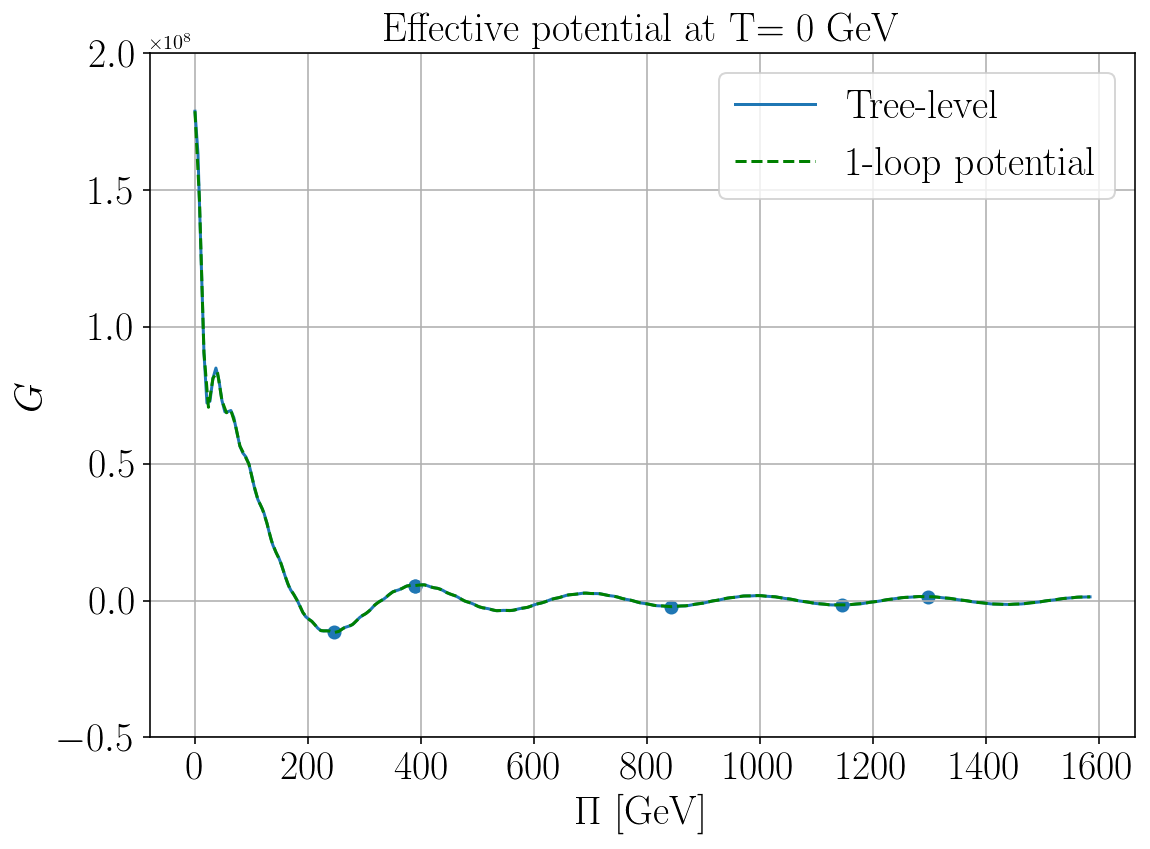

In [6]:
myargs={"Ngb":4,"na_coeffs":[(n1, a1),(n2, a2)]}
m=model1(myargs)


print("True vacuum are h=",m.vacua_list*m.f)
print("Confinement scale f=",m.f)

T1=(24*m.f**2/(a1*n1*(n1+2*lam)))**.5
T2=(24*m.f**2/(abs(a2)*n2*(n2+2*lam)))**.5
print("Relevant temperatures are")
print("T1=",T1,",T2=",T2)
m.plot1()
m.plot2(0)

plt.ylim(-.05e9,.2e9)
#plt.savefig('./PLOTS/G_hierachical_1.pdf', dpi=300)

#bosons=m.boson_massSq( v, 0)
#fermions=m.fermion_massSq(v)

#m.V1(bosons,fermions)
#m.Vtot(0,0)


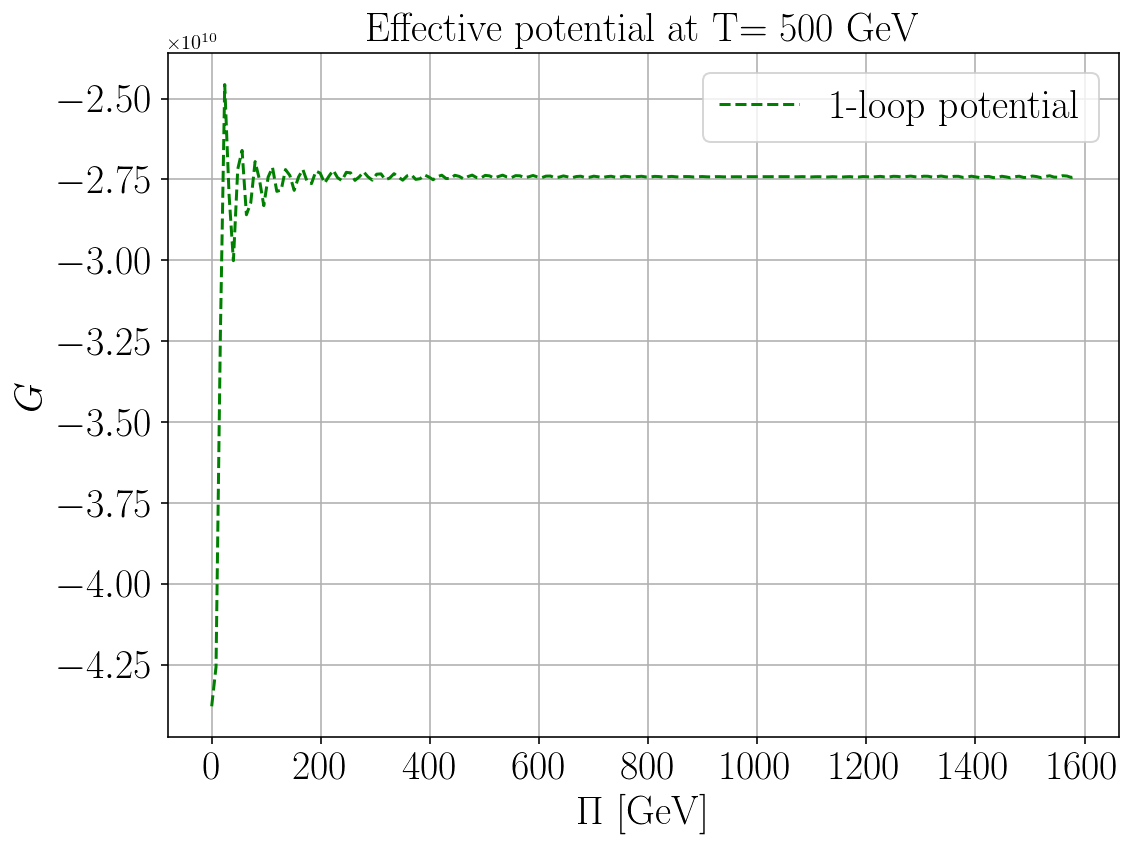

In [9]:
Temp=500
m.plot2(Temp)

min_list=m.findMinima(Temp)
#if len(min_list)>0:
#    plt.scatter(min_list,m.Vtot(min_list,Temp),c="b",marker="X")

#plt.arrow(min_list[0],m.Vtot(min_list[0],Temp),min_list[1],m.Vtot(min_list[1],Temp)-m.Vtot(min_list[0],Temp),
#          color='red', head_length = 1.7, head_width = 10.25, length_includes_head = True)

#plt.annotate(s='', xy=(min_list[-1],m.Vtot(min_list[-1],Temp)), xytext=(min_list[0],m.Vtot(min_list[0],Temp)), 
#             arrowprops=dict(arrowstyle='->',color="black",mutation_scale=15,linewidth=3))

#plt.savefig('./PLOTS/G_hierachical_4.pdf', dpi=300)


In [77]:
min_list

[]

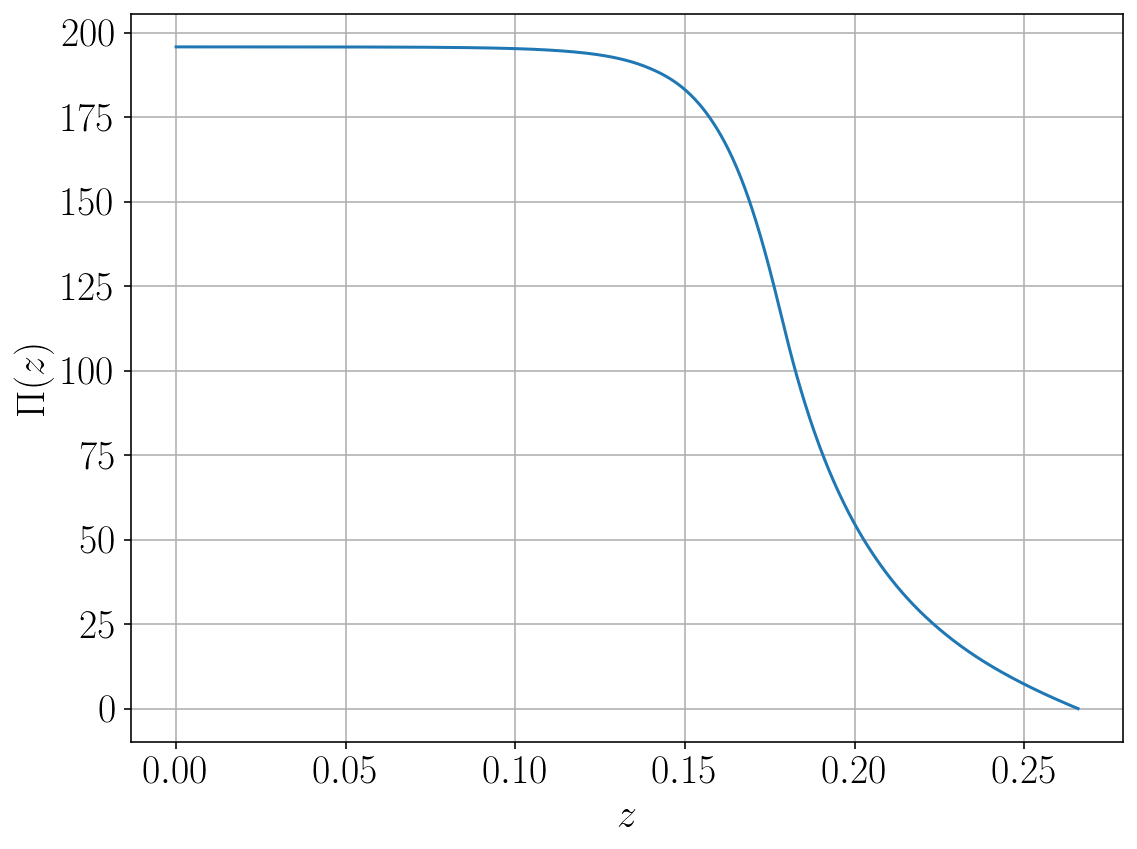

In [80]:
phi_false=min_list[0]
phi_true=min_list[-1]
r_range=np.linspace(phi_false,phi_true)
pot_fun=lambda h : m.Vtot(h,Temp)

instanton=SingleFieldInstanton(phi_true, phi_false, pot_fun)
phi_profile=instanton.findProfile()
S_3=instanton.findAction(phi_profile)
Hubble1=Hubble_radiation(Temp)
Hubble2=((m.Vtot(phi_false,Temp)-m.Vtot(phi_true,Temp))/3/Mplanck**2)
Hubble=Hubble1+Hubble2
Gamma_rate=Gamma_Hubble4(S_3,Temp)


plt.plot(phi_profile.R, phi_profile.Phi)
plt.xlabel("$z$",size=label_size)
plt.ylabel("$\Pi(z)$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.grid(True)
#mytitle="Effective potential at T= "+str(T)+" GeV"
#plt.title(mytitle,size=label_size)
plt.tight_layout()

In [62]:
Hubble1,Hubble2



(6.58250206794052e-27, 9.477134777858301e-31)

In [63]:
Gamma_rate/Hubble**2,Gamma_rate,np.exp(-140)

(1.9663305189945065e+60, 85224325.76588185, 1.580420060273613e-61)

In [64]:
S_3/Temp,S_3

(1.3101149416919067, 314.4275860060576)

In [65]:
m.nucleation_(Temp)

{'phi_false': 79.40001000000001,
 'phi_true': 202.40001,
 'Tn': 240,
 'Gamma': 85224325.76588185,
 'S_3': 314.4275860060576,
 'Hubble1': 6.58250206794052e-27,
 'Hubble2': 9.477134777858301e-31,
 'alpha': 0.0010816914967168678}

In [66]:
nucleation_list=[]
for temp in np.linspace(240,250):
    try:
        #Gamma_rate, S_3, Hubble1, Hubble2 = m.nucleation_(temp)
        #nuc_output={"Tn":temp,"Gamma":Gamma_rate,"S_3":S_3,"Hubble1":Hubble1,"Hubble2":Hubble2}
        nuc_output=m.nucleation_(temp)
        if len(nuc_output)!=0:
            nucleation_list.append(nuc_output)
    except:
        continue
    
df_nuc=pd.DataFrame(nucleation_list).dropna()



/Users/marcoantoniomerchandmedina/opt/anaconda3/envs/cosmoT/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoantoniomerchandmedina/opt/anaconda3/envs/cosmoT/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in sqrt
/Users/marcoantoniomerchandmedina/opt/anaconda3/envs/cosmoT/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoantoniomerchandmedina/opt/anaconda3/envs/cosmoT/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in sqrt
/Users/marcoantoniomerchandmedina/opt/anaconda3/envs/cosmoT/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in true_divide
/Users/marcoantoniomerchandmedina/opt/anaconda3/envs/cosmoT/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered 

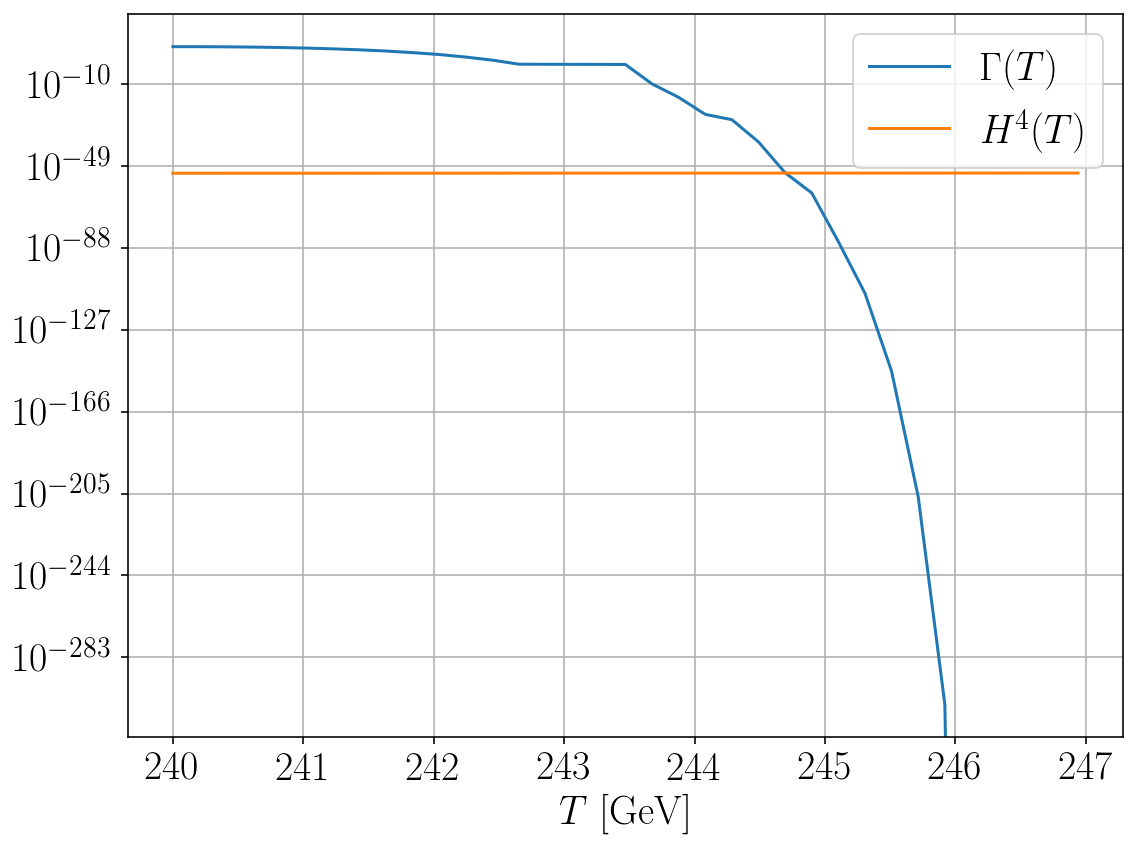

In [167]:
plt.plot(df_nuc["Tn"],df_nuc["Gamma"],label="$\Gamma(T)$")
plt.plot(df_nuc["Tn"],(df_nuc["Hubble1"]+df_nuc["Hubble2"])**2,label="$H^4(T)$")
#plt.plot(df_nuc["Tn"],N_nuc(df_nuc["Tn"])+1)
plt.yscale("log")

plt.xlabel("$T$ [GeV]",size=label_size)
#plt.ylabel("$\Gamma/H^4$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.grid(True)
plt.legend()
plt.legend(prop={'size': label_size})
#mytitle="Effective potential at T= "+str(T)+" GeV"
#plt.title(mytitle,size=label_size)
plt.tight_layout()
plt.savefig('./PLOTS/Rates_1.pdf', dpi=300)
plt.show()

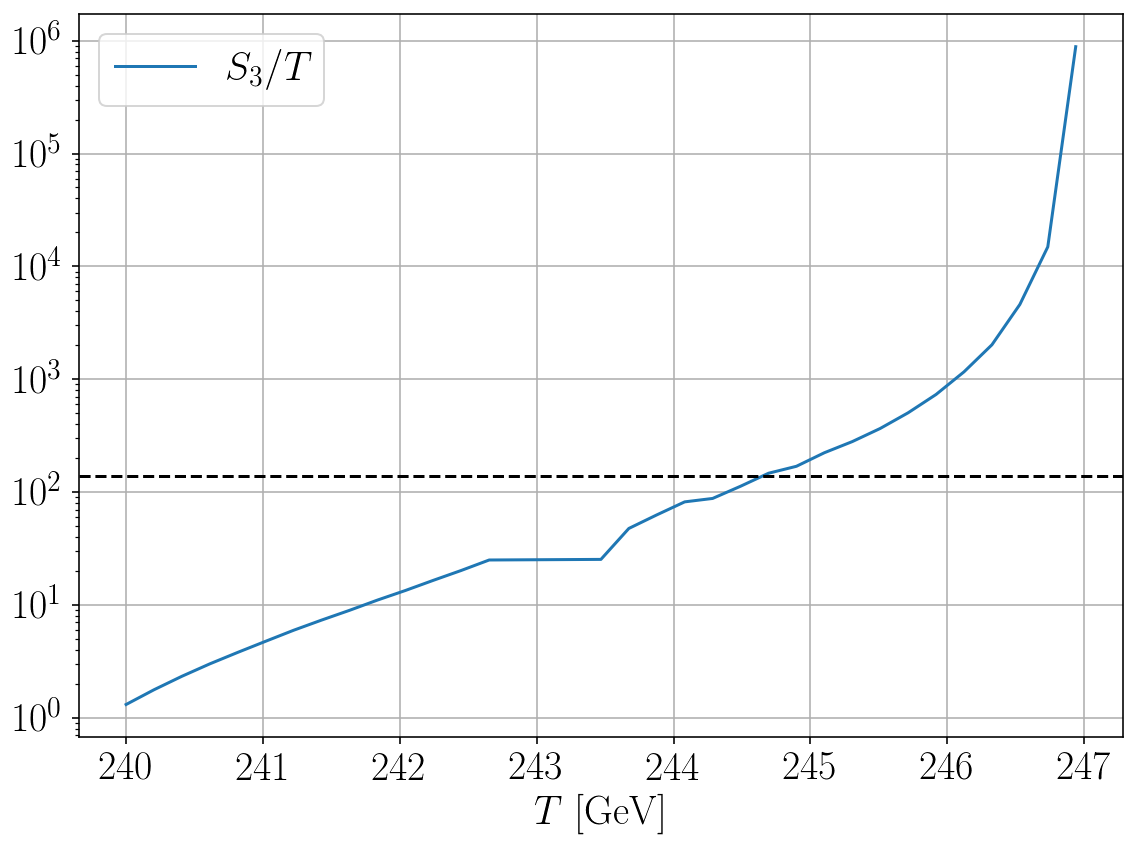

In [168]:

plt.plot(df_nuc["Tn"],df_nuc["S_3"]/df_nuc["Tn"],label="$S_3/T$")
plt.yscale("log")
plt.xlabel("$T$ [GeV]",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.grid(True)
plt.legend()
plt.legend(prop={'size': label_size})
plt.axhline(y=140,c="k",linestyle="--",label="140")

plt.tight_layout()
plt.savefig('./PLOTS/Euclidean_action_1.pdf', dpi=300)
plt.show()

In [164]:
N_nuc=interpolate.interp1d(df_nuc["Tn"],(df_nuc["Hubble1"]+df_nuc["Hubble2"])**2/df_nuc["Gamma"]-1)
Tnuc=optimize.root_scalar(N_nuc,bracket=(df_nuc["Tn"].min(),df_nuc["Tn"].max())).root

S_T_inter=interpolate.interp1d(df_nuc["Tn"],df_nuc["S_3"]/df_nuc["Tn"])
beta=Tnuc*misc.derivative(S_T_inter, x0=Tnuc, dx=1e-0, n=1)

alpha_inter=interpolate.interp1d(df_nuc["Tn"],df_nuc["alpha"])


In [165]:
LISA_sens = np.loadtxt( 'PLS_ESACallv1-2_04yr.txt' )[::20]


def v_J(alph):
    """Jouguet velocity"""
    return (1/3**.5 + (2*alph/3+alph**2)**.5)/(1+alph)
def kappa_swC(alph):
    return alph**.5/(0.135+(0.98+alph)**.5)
def kappa_swD(alph):
    return alph/(.73+0.083*alph**.5+alph)
def kappa_sw(alph,vw):
    return (v_J(alph)-1)**3*v_J(alph)**2.5*vw**(-2.5)*kappa_swC(alph)*kappa_swD(alph)/(((v_J(alph)-1)**3-(vw-1)**3)*v_J(alph)**2.5*kappa_swC(alph)+(vw-1)**3*kappa_swD(alph))
def Omega_GW(Tn,alph,bet,vw):
    factor=(8*np.pi)**(1/3)*vw/(3/4*kappa_sw(alph,vw)*alph/(1+alph))**.5/bet
    if factor>1:
        factor=1
    return 1.67e-5*(g_star(Tn)/100)*(g_sstar(Tn)/100)**(-4/3.)*5*(vw-cs)*(kappa_sw(alph,vw)*alph/(1+alph))**2*4/3/np.pi**2/bet*factor
def fp(Tn,alph,bet,vw):
    return 2.6323113e-6*(g_star(Tn)/100)**(1/6.)*(Tn/100)*bet
def f2overfp(vw):
    return 1/(vw-cs)
def normalization(f2overfp):
    return -2.23*f2overfp**(-4) + 5.03*f2overfp**(-3) - 2.61*f2overfp**(-2) + 2.42*f2overfp**(-1) + 0.21
def spectrum(f,fp,f2overfp):
    #print(f,fp,f2overfp)
    return normalization(f2overfp)*(f/fp)**3*(1+(f/fp)**3)**(-1)*(1+(f/f2overfp/fp)**4)**(-1)
def Omega_GWspectrum(Tn,alph,bet,vw):
    frange=np.logspace(-10,4,500)
    Omegaout=Omega_GW(Tn,alph,bet,vw)*spectrum(frange,fp(Tn,alph,bet,vw),f2overfp(vw))/spectrum(fp(Tn,alph,bet,vw),fp(Tn,alph,bet,vw),f2overfp(vw))
    return np.array([frange,Omegaout])

def SNR_GW(signal):
    """Computes SNR given signal (f,Omega)"""
    time=4
    f,Om=signal
    OmGW=interpolate.interp1d(f,Om, kind='cubic')
    Om=OmGW(LISA_sens[::,0])
    On=LISA_sens[::,3]
    integral=integrate.simps(Om**2/On**2,LISA_sens[::,0])
    SNR_val=(time*3.15*10**7*integral)**0.5

#    plt.plot(LISA_sens[::,0],OmGW(LISA_sens[::,0]))
#    plt.plot(LISA_sens[::,0],LISA_sens[::,3] )
#    plt.title("SNR="+str(SNR_val))
#    plt.xscale("log")
#    plt.yscale("log")
#    plt.xlabel("f[HZ]",size=label_size)
#    plt.ylabel("$\\Omega_{GW}$",size=label_size)
#    plt.xticks(fontsize=thick_size)
#    plt.yticks(fontsize=thick_size)
#    plt.show()
    return SNR_val




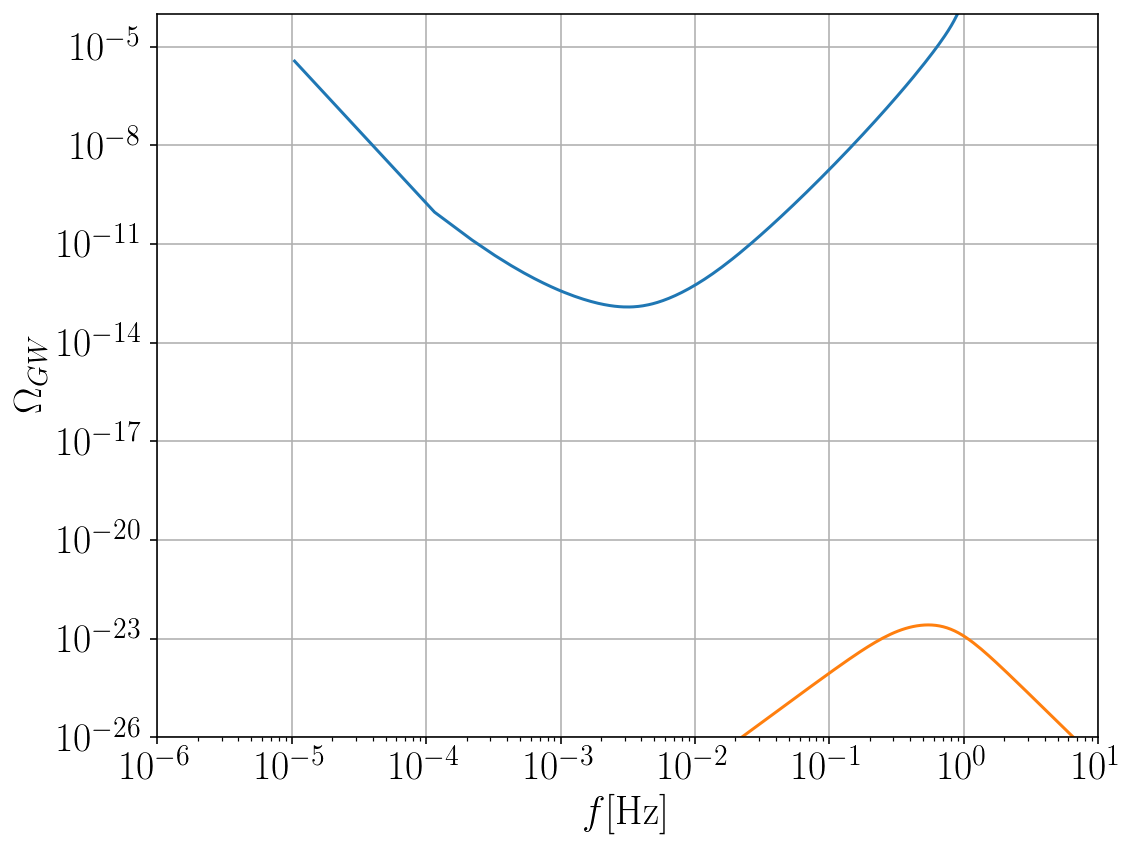

In [171]:
Temp,al,beta,vel=Tnuc,alpha_inter(Tnuc),beta,1

omega=Omega_GWspectrum(Temp,al,beta,vel)

plt.plot(LISA_sens[::,0],LISA_sens[::,3])
plt.plot(omega[0],omega[1])
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-26,1e-4)
plt.xlim(1e-6,10)
plt.xlabel("$f$[Hz]",size=label_size)
plt.ylabel("$\\Omega_{GW}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.grid(True)

plt.tight_layout()
plt.savefig('./PLOTS/Spectrum_1.pdf', dpi=300)
plt.show()


In [172]:
Tnuc

244.69387755104242